## Image processing - filters

By going through this jupyter notebook and filling in the blanks you will learn how to apply different image processing filters to an image.

The example code and solutions were created by **André Lopes Marinho** and **Berit Zeller-Plumhoff**.

You will require the following libraries. If loading any of them fails, please use ``pip install`` to install any missing libraries.

In [34]:
# Importing libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import imageio as iio
import skimage

---
### Loading relevant functions from the previous notebook

In [35]:
def load_and_show_image(path):
    """
    Load and display an image from the given path.

    Args:
        path (str): The path to the image file, including the file extension.
                    Example: "images/example.tif"

    Returns:
        numpy.ndarray: The image data as a NumPy array.
    """
    # Use imageio to read the image
    image = iio.imread(path)

    # Display the image in grayscale using matplotlib
    plt.imshow(image, cmap="gray")
    plt.show()  # Ensure the image is displayed

    # Print a success message
    print(f"The image from {path} was loaded successfully.")

    return image


def get_signal_to_noise_ratio(region_i, region_bg):
    """Calculates Signal-to-Noise Ratio (SNR) by the following expression:

                SNR = |mean(region_i)| / 0.5*[sqrt(stdev(region_i)^2 + stdev(region_bg)^2)]

    Args:
        region_i(numpy.ndarray): Array slice defining region i
        region_bg(numpy.ndarray): Array slice defining background region
    Returns:
        double: SNR value
    """

    # calculate the mean value of region_i
    a = np.mean(region_i)
    # calculate the denominator of the SNR
    b = 0.5 * math.sqrt(np.std(region_i) ** 2 + np.std(region_bg) ** 2)

    # compute and return the SNR
    SNR = a / b

    return SNR


def get_contrast_to_noise_ratio(region_i, region_j):
    """Calculates Contrast-to-Noise Ratio (CNR) by the following expression:

                CNR = |mean(region_i) - mean(region_j)| / 0.5*[sqrt(stdev(region_i)^2 + stdev(region_j)^2)]

    Args:
        region_i(numpy.ndarray): Array slice defining region i
        region_bg(numpy.ndarray): Array slice defining region j
    Returns:
        double: CNR value
    """

    # calculate the numerator of the CNR
    a = abs(np.mean(region_i) - np.mean(region_j))
    # calculate the denominator of the CNR
    b = 0.5 * math.sqrt(np.std(region_i) ** 2 + np.std(region_j) ** 2)

    # compute and return the CNR
    CNR = a / b

    return CNR

---
### Load and display the image used for the exercise

Load and display image ``08_soil_and_roots_8bit_2.png`` using ``load_and_show_image()`` function you defined in the previous exercise.

---
_- solve the exercise beneath using markdown and/or code blocks -_

C:\Users\carst\AppData\Local\Temp\ipykernel_11948\381890969.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = iio.imread(path)


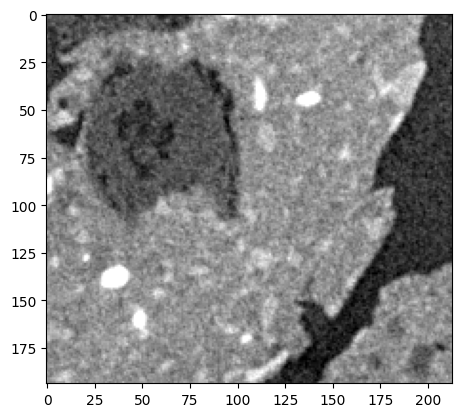

The image from data/08_soil_and_roots_8bit_2.png was loaded successfully.


In [36]:
# Ensure images display in the Jupyter notebook as static image, interactive widget or in a seperate window. [inline, widget, qt]
%matplotlib inline

# load the image used for the exercise and show it
image_raw = load_and_show_image(path="data/08_soil_and_roots_8bit_2.png")

---
### Image filters - Mean filter

If the image quality that we have determined is insufficient, e.g. if the **CNR is particularly low**, we can apply **filters to improve the noise level** while maintaining the sharpness of the features we are interested in.  
To do so, you will complete a function that defines a **mean filter** which is applied as a quadratic kernel template to the image. The function takes the original image and the filter kernel size as input and outputs the filtered image. You can move the template across the image in a scanning manner - in order to adjust for the edges correctly, you should apply a **zero padding at the image borders**.

---
_- solve the exercise beneath using markdown and/or code blocks -_

In [37]:
def mean_filter(image, filter_size):
    """Applies a mean filter to the given image.

    Args:
        image (numpy.ndarray): The image to be filtered.
        filter_size (int): The size of the filter (kernel).
    Returns:
        numpy.ndarray: The filtered image.
    """

    # Create an empty list to temporarily store the image slices (not used later, so this isn't necessary)
    temp = []

    # Calculate the padding needed to extend the image edges
    padding = filter_size // 2

    # Create an empty image with the same dimensions as the input image
    img_final = np.zeros((image.shape))

    # Create an auxiliary image (img_aux) which is larger to accommodate the padding around the original image
    img_aux = np.zeros((image.shape[0] + padding * 2, image.shape[1] + padding * 2))

    # Copy the original image into the center of the auxiliary image
    img_aux[padding:-padding, padding:-padding] = image.copy()

    # Iterate over each pixel in the original image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract a region (sub-array) of the size of the filter from the auxiliary image
            temp = img_aux[i : i + filter_size, j : j + filter_size]

            # Calculate the mean of the selected region and store it in the final image
            img_final[i][j] = np.mean(temp)

    # Return the filtered image
    return img_final


To understand the above function, we split it into single steps.

In [38]:
image = image_raw

# set the filter size parameter
filter_size = 4

# Calculate the padding needed to extend the image edges in all directions
padding = filter_size // 2
# Create an empty image with the same dimensions as the input image
img_final = np.zeros((image.shape))

Create the auxiliary larger image and plot against the original image:

Raw image shape: (194, 213)
Auxiliary image shape: (198, 217)


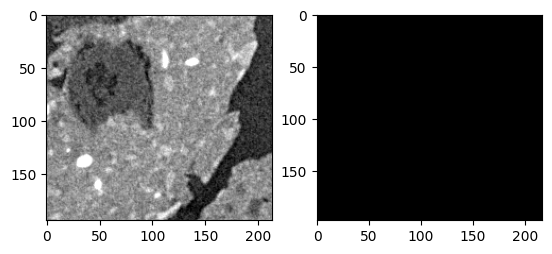

In [39]:
img_aux = np.zeros((image.shape[0] + padding * 2, image.shape[1] + padding * 2))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image_raw, cmap="gray")
ax2.imshow(img_aux, cmap="gray")

print(f"Raw image shape: {image_raw.shape}")
print(f"Auxiliary image shape: {img_aux.shape}")

Copy the pixel from the raw image to the auxiliary image. Note the black frame in the right-hand picture.

Raw image shape: (194, 213)
Auxiliary image shape: (198, 217)


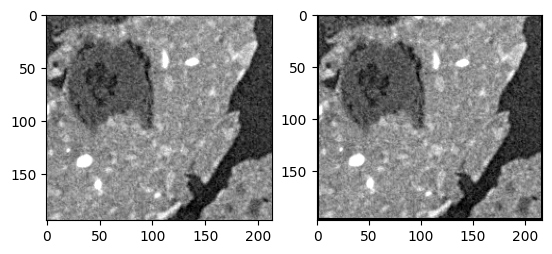

In [40]:
img_aux[padding:-padding, padding:-padding] = image.copy()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image_raw, cmap="gray")
ax2.imshow(img_aux, cmap="gray")

print(f"Raw image shape: {image_raw.shape}")
print(f"Auxiliary image shape: {img_aux.shape}")

Select some ``i`` and ``j`` values to check what the loop does for each pixel.

Raw image shape: (194, 213)
Temp image shape: (4, 4)


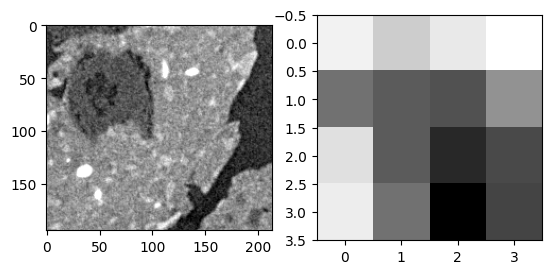

In [41]:
i = 100
j = 150
temp = img_aux[i : i + filter_size, j : j + filter_size]

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image_raw, cmap="gray")
ax2.imshow(temp, cmap="gray")

print(f"Raw image shape: {image_raw.shape}")
print(f"Temp image shape: {temp.shape}")

Calculate the mean grey value of the selected region and store it in the final image at the desired pixel position `i` and `j`.

Raw image shape: (198, 217)
Auxiliary image shape: (194, 213)


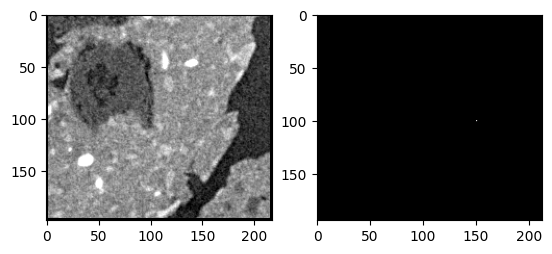

In [42]:
img_final[i][j] = np.mean(temp)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img_aux, cmap="gray")
ax2.imshow(img_final, cmap="gray")

print(f"Raw image shape: {img_aux.shape}")
print(f"Auxiliary image shape: {img_final.shape}")

Apply the filter to the image ``08_soil_and_roots_8bit_2.png`` with **different kernel sizes** and plot both the original and the filtered image next to each other.

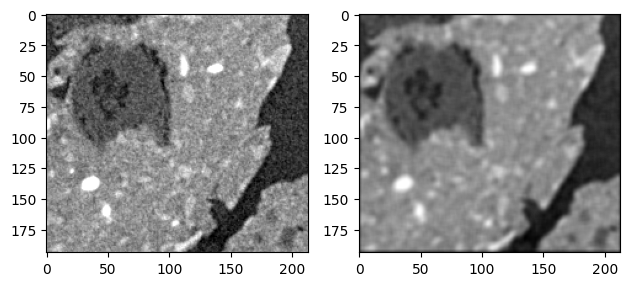

In [43]:
# Mean filter
img_mean = mean_filter(image_raw, 5)

# Plot your results to compare each one
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image_raw, cmap="gray")
ax2.imshow(img_mean, cmap="gray")
fig.tight_layout()

**Finally**, compute the **CNR** for the same regions your defined on the image in the last exercise.

CNR soil vs. root after filtering:  14.82
CNR soil vs. air after filtering:  21.8
CNR air vs. root after filtering:  10.11


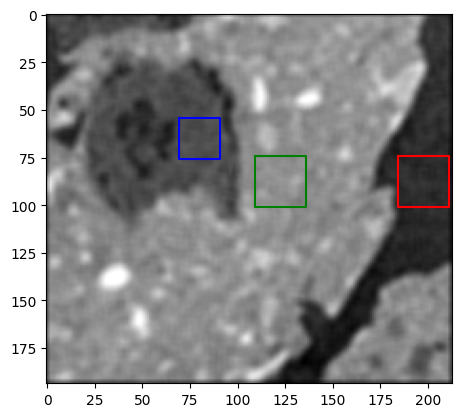

In [44]:
# Select different regions from the image and calculate SNR and CNR values

# Regions from last exercise
air2 = img_mean[75:100, 185:210]
soil2 = img_mean[75:100, 110:135]
root2 = img_mean[55:75, 70:90]

# Visualizing them on the image

img_aux = img_mean.copy()

row_air, col_air = skimage.draw.rectangle_perimeter(start=(75, 185), end=(100, 210))
row_soil, col_soil = skimage.draw.rectangle_perimeter(start=(75, 110), end=(100, 135))
row_root, col_root = skimage.draw.rectangle_perimeter(start=(55, 70), end=(75, 90))

# For better vizualization

fig, ax = plt.subplots()
ax.imshow(img_aux, cmap="gray")
ax.plot(col_air, row_air, "-r")
ax.plot(col_soil, row_soil, "-g")
ax.plot(col_root, row_root, "-b")

# Calculate CNR

# CNR - Soil and Root
CNR1_mean = get_contrast_to_noise_ratio(soil2, root2)
print("CNR soil vs. root after filtering: ", np.round(CNR1_mean, 2))

# CNR - Soil and Air
CNR2_mean = get_contrast_to_noise_ratio(soil2, air2)
print("CNR soil vs. air after filtering: ", np.round(CNR2_mean, 2))

# CNR - Air and Root
CNR3_mean = get_contrast_to_noise_ratio(air2, root2)
print("CNR air vs. root after filtering: ", np.round(CNR3_mean, 2))

**Comment:**  
As the **CNR** has increased by a factor of approx. 2 for all region comparisons, we can assume that the **mean filter** with **kernel size 3** has reduced the noise in the image by the same factor.

---
### Image filters - Median filter

**In addition** to the mean filter, we are interested in using a **median filter**. Write a function that will apply the respective filter and output the filtered image, given a certain input image and kernel size.

---
_- solve the exercise beneath using markdown and/or code blocks -_

In [45]:
def median_filter(image, filter_size):
    """Applies median filter in a given image.

    Args:
        image(numpy.ndarray): Image to be filtered
        filter_size(int): Size of kernel
    Returns:
        numpy.ndarray: Filtered image
    """

    temp = []
    padding = filter_size // 2
    img_final = np.zeros((image.shape))

    img_aux = np.zeros((image.shape[0] + padding * 2, image.shape[1] + padding * 2))
    img_aux[padding:-padding, padding:-padding] = image.copy()

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp = img_aux[i : i + filter_size, j : j + filter_size]
            img_final[i][j] = np.median(temp)

    return img_final


Apply the filter to ``08_soil_and_roots_8bit_2.png`` using different filter parameters.

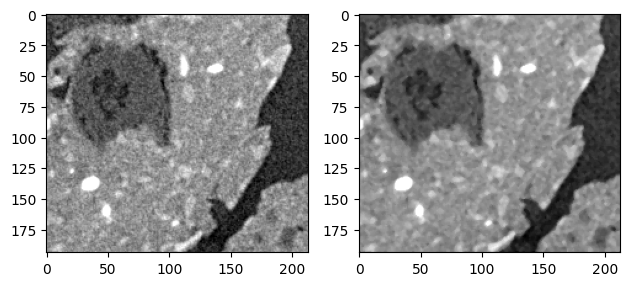

In [46]:
# median filter
image_median = median_filter(image_raw, 3)

# Plot your results to compare each one
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image_raw, cmap="gray")
ax2.imshow(image_median, cmap="gray")
fig.tight_layout()

**Comment:**  
The images indicate that **larger kernel sizes overall lead to a stronger smoothing of the image**. The kernel sizes are set higher than they would often be set to emphasize the point. It is visible that the median filter maintains edges well while smoothing, if we consider in particular kernel size 10 and compare to mean filter, which lead to higher blurring.

---
### Image filters - Gaussian filter

We also like to apply a **Gaussian filter**. Write a function that will apply the respective filter and output the filtered image, given a certain input image and standard deviation $\sigma$.

---
_- solve the exercise beneath using markdown and/or code blocks -_

In [47]:
def gaussian_filter(image, filter_size, sigma):
    """Applies median filter to a given image.

    Args:
        image(numpy.ndarray): Image to be filtered
        filter_size(numpy.ndarray): Size of kernel
        sigma(double): Standard deviation for Gaussian distribution

    Returns:
        numpy.ndarray: Filtered image
    """
    temp = []
    padding = filter_size // 2
    img_final = np.zeros((image.shape))

    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * math.pi * sigma**2))
        * math.e
        ** (
            (-1 * ((x - (filter_size - 1) / 2) ** 2 + (y - (filter_size - 1) / 2) ** 2))
            / (2 * sigma**2)
        ),
        (filter_size, filter_size),
    )

    kernel /= np.sum(kernel)

    img_aux = np.zeros((image.shape[0] + padding * 2, image.shape[1] + padding * 2))
    img_aux[padding:-padding, padding:-padding] = image.copy()

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp = img_aux[i : i + filter_size, j : j + filter_size]
            temp_aux = np.reshape(temp, (filter_size**2))
            gauss = kernel.reshape((filter_size**2))
            img_final[i][j] = np.sum(np.outer(temp_aux, gauss))
            temp = []

    return img_final

Apply the filter to ``08_soil_and_roots_8bit_2.png`` using different filter parameters.

In [48]:
img_gauss = gaussian_filter(, filter_size=, sigma=)

# Plot your results to compare each one
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image_raw, cmap="gray")
ax2.imshow(img_gauss, cmap="gray")
fig.tight_layout()

SyntaxError: invalid syntax (2527751093.py, line 1)

**Comment:**  
Like in the mean filter, the Gaussian filter lead to higher blurring compared to the median filter. The influence of the value of sigma appears low.

---
### Image Filters - Fourier filter

**In addition** to the above filters, applying a **Fourier filter**, e.g. either a **high-, low- or a bandpass** filter can be very useful in order to highlight edges or smoothen the image. In the following, you should write three functions that will apply the different kinds of Fourier filters given an input image and the filter parameters.  
Start by loading and displaying ``08_soil_and_roots_8bit_2.png`` - we will be working with this image in the following.

---
_- solve the exercise beneath using markdown and/or code blocks -_

We will begin by applying a highpass filter - you will be required to use the image and the filter size as input to your function. Apply the **2D Fourier transform** from ``numpy`` to your image and shift the resulting spectrum to the center of the image. You should then create a circular mask based on the filter size that sets all low frequencies, i.e. those in the center of the Fourier spectrum, to zero. Then perform the inverse Fourier operations (shifting the spectrum back first).

Plot the **original image**, the **magnitude spectrum**, the **highpass filter mask** and the **image after filtering** next to each other.

#### High Pass Filter

In [83]:
def fft_highpass_filter(image, filter_size):
    """Applies highpass Fourier filter to a given image.

    Args:
        image(numpy.ndarray): Image to be filtered
        filter_size(numpy.ndarray): Number of frequency-equivalent pixels to remove

    Returns:
        numpy.ndarray: Filtered image
    """

    # use the numpy 2D Fourier function to transform the input image
    f = np.fft.fft2(image)

    # shift the spectrmu to the center
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    # draw a cylindrical mask using the filter size to filter out the low frequencies
    crow = fshift.shape[0] // 2
    ccol = fshift.shape[1] // 2
    rr, cc = skimage.draw.disk(
        center=(crow, ccol), radius=filter_size, shape=fshift.shape[0:2]
    )
    filter_img = np.ones((fshift.shape[0], fshift.shape[1]))
    filter_img[rr, cc] = 0
    fshift = fshift * filter_img

    # perform the inverse transform
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    # Plot the original image, the magnitude spectrum, the highpass filter mask
    # and the image after filtering next to each other.
    plt.subplot(141), plt.imshow(image, cmap="gray")
    plt.title("Input image"), plt.xticks([]), plt.yticks([])
    plt.subplot(142), plt.imshow(magnitude_spectrum, cmap="gray")
    plt.title("Magnitude spectrum"), plt.xticks([]), plt.yticks([])
    plt.subplot(143), plt.imshow(filter_img, cmap="gray")
    plt.title("Highpass filter"), plt.xticks([]), plt.yticks([])
    plt.subplot(144), plt.imshow(img_back, cmap="gray")
    plt.title("Image after HPF"), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()

    return img_back

Now use the function you have just defined on the image of the soil and root **with different input filter sizes** and comment on how the filter influences the image.

In [ ]:
image_hpf = fft_highpass_filter(image_raw, 4)

**Comment:**  
The highpass filter as implemented by us deletes the low spatial frequencies, which are long stretches of similar greyscale. Therefore, when setting a small filter size (5), we are left in particular with near-edge features and the smaller rocks within the soil. When setting a larger filter size (50) we are left with only the very high frequencies, and therefore the image noise. Thus, we could use a high-pass filter to localise the image noise and subtract if from the image.

#### Low Pass Filter

Next, define a function for a **low-pass Fourier filter**. Do the same as above, but maintain the low frequencies this time.

In [85]:
def fft_lowpass_filter(image, filter_size):
    """Applies lowpass Fourier filter to a given image.

    Args:
        image(numpy.ndarray): Image to be filtered
        filter_size(numpy.ndarray): Number of frequency-equivalent pixels to remove

    Returns:
        numpy.ndarray: Filtered image
    """
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    crow = fshift.shape[0] // 2
    ccol = fshift.shape[1] // 2
    rr, cc = skimage.draw.disk(
        center=(crow, ccol), radius=filter_size, shape=fshift.shape[0:2]
    )
    filter_img = np.zeros((f.shape[0], f.shape[1]))
    filter_img[rr, cc] = 1
    fshift = fshift * filter_img
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    plt.subplot(141), plt.imshow(image, cmap="gray")
    plt.title("Input image"), plt.xticks([]), plt.yticks([])
    plt.subplot(142), plt.imshow(magnitude_spectrum, cmap="gray")
    plt.title("Magnitude spectrum"), plt.xticks([]), plt.yticks([])
    plt.subplot(143), plt.imshow(filter_img, cmap="gray")
    plt.title("Lowpass filter"), plt.xticks([]), plt.yticks([])
    plt.subplot(144), plt.imshow(img_back, cmap="gray")
    plt.title("Image after LPF"), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()

    return img_back

Apply the **low-pass filter** to the image of the soil and root for different input filter sizes and comment on how the image is changed.

In [ ]:
image_lpf = fft_lowpass_filter(image_raw, 10)

**Comment:**  
The lowpass filter leaves the image features that contain similar greyscales and appears to lead to a blurring of the image. For low filter size values (2) we are left with only vague features in our sample, slightly higher values (5) define these features more clearly and for very high numbers (50) the image after filtering appears similar to the original as only regions of high noise have been removed.

#### Band Pass Filter

Finally, define a **Fourier bandpass filter** which takes two filter sizes as input for low- and high-frequency thresholds, respectively.

In [87]:
def fft_bandpass_filter(image, filter_size1, filter_size2):
    """Applies bandpass fourier filter to a given image.

    Args:
        image(numpy.ndarray): Image to be filtered
        filter_size1(numpy.ndarray): Number of frequency-equivalent pixels to remove fp

    Returns:
        numpy.ndarray: Filtered image
    """
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    crow = fshift.shape[0] // 2
    ccol = fshift.shape[1] // 2
    rr, cc = skimage.draw.disk(
        center=(crow, ccol), radius=filter_size2, shape=fshift.shape[0:2]
    )
    filter_img = np.zeros((f.shape[0], f.shape[1]))
    filter_img[rr, cc] = 1
    rr, cc = skimage.draw.disk(
        center=(crow, ccol), radius=filter_size1, shape=fshift.shape[0:2]
    )
    filter_img[rr, cc] = 0
    fshift = fshift * filter_img
    fshift = fshift * filter_img
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    plt.subplot(141), plt.imshow(image, cmap="gray")
    plt.title("Input image"), plt.xticks([]), plt.yticks([])
    plt.subplot(142), plt.imshow(magnitude_spectrum, cmap="gray")
    plt.title("Magnitude spectrum"), plt.xticks([]), plt.yticks([])
    plt.subplot(143), plt.imshow(filter_img, cmap="gray")
    plt.title("Bandpass filter"), plt.xticks([]), plt.yticks([])
    plt.subplot(144), plt.imshow(img_back, cmap="gray")
    plt.title("Image after BPF"), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()

    return img_back

Apply the **bandpass filter** to the image of the soil and root for different input filter sizes and comment on how the image is changed.

In [ ]:
image_bpf = fft_bandpass_filter(image_raw, 10, 20)

**Comment:**  
The bandpass filter can be used to identify edges or highlight frequencies that could be removed from the image. Depending on the setting of the frequencies, it will define a low- or highpass filter or specify frequencies in between.

---